# Earthquake Type Prediction

1. **Research Objective** - From given datasets of Earthquake between 1965- 2016, trying to predict, if a given earthquake is **automatic or reviewed**.
(An earthquake is "reviewed" when automatic earthquake detection systems fail to record the earthquake.)

2. About the dataset - Significant Earthquakes, 1965-2016, sourced from Kaggle [link](https://www.kaggle.com/datasets/usgs/earthquake-database)


We will use a TensorFlow ANN to make our predictions.

##Data Wrangling

### Gathering Data

```
# This is formatted as code
```



In [ ]:
#importing libraires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
df = pd.read_csv("database.csv")

In [ ]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

##Pre-Processing

In [ ]:
df.isna()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
23408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
23409,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
23410,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [ ]:
# We are dropping those columns which have more than two third of their values are missing.
df.isna().sum() > 0.66 * df.shape[0]

Date                          False
Time                          False
Latitude                      False
Longitude                     False
Type                          False
Depth                         False
Depth Error                    True
Depth Seismic Stations         True
Magnitude                     False
Magnitude Type                False
Magnitude Error                True
Magnitude Seismic Stations     True
Azimuthal Gap                  True
Horizontal Distance            True
Horizontal Error               True
Root Mean Square              False
ID                            False
Source                        False
Location Source               False
Magnitude Source              False
Status                        False
dtype: bool

In [ ]:
 #list of columns which have two third null values

 null_columns = df.loc[:,df.isna().sum() > 0.66 * df.shape[0]].columns

In [ ]:
null_columns

Index(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
       'Horizontal Error'],
      dtype='object')

In [ ]:
#dropping the above columns
df= df.drop(null_columns, axis=1)

In [ ]:
#checking again for the columns having missing values
df.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
ID                     0
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [ ]:
# In root Mean Square column we will replace the missing values with calculated mean value of the whole column

df['Root Mean Square'] = df['Root Mean Square'].fillna(df['Root Mean Square'].mean())

In [ ]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed


In [ ]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [ ]:
#now dropping the rows which have missing values from the dataframe
df = df.dropna(axis=0).reset_index(drop=True)

In [ ]:
#Now we can see there ain't any missing values in the dataset

df.isna().sum().sum()

0

In [ ]:
df.drop('ID', axis =1)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed


#Feature Engineering

In [ ]:
  # we are reteriving month and year from the date column and making a seperate column for month and year

df['Month'] = df['Date'].apply(lambda x: x[0:2])
df['Year'] = df['Date'].apply(lambda x: x[-4: ])

In [ ]:
# Since we have the Month and Year, We will drop the original date column
df = df.drop('Date', axis=1)

In [ ]:
#since we have sliced as a string, therefore we have to convert them into integer (both the columns)
df['Month'] = df['Month'].astype(np.int)
df['Year'] = df['Year'].astype(np.int)

<ipython-input-256-7f49e09fc827>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Month'] = df['Month'].astype(np.int)
<ipython-input-256-7f49e09fc827>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

ValueError: ignored

In [ ]:
# it looks like that in year column there are inputs like '000Z'. We are finding rows containing such values
df[df['Year'].str.contains('Z')]


,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year
3378,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,USP0000A09,US,US,US,Reviewed,19,000Z
7510,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,USP0002E81,US,US,HRV,Reviewed,19,530Z
20647,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,USP000HWQP,US,US,GCMT,Reviewed,20,520Z


In [ ]:
#There are only three such rows. Therefore, dropping those rows

df= df.drop(df[df['Year'].str.contains('Z')].index, axis=0).reset_index(drop=True)

In [ ]:
df['Month'] = df['Month'].astype(np.int)
df['Year'] = df['Year'].astype(np.int)

<ipython-input-259-0d421015cd95>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Month'] = df['Month'].astype(np.int)
<ipython-input-259-0d421015cd95>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

In [ ]:
# From time column, retrieving hour and type casting into integer
df['Hour'] = df['Time'].apply(lambda x: np.int(x[0:2]))

<ipython-input-260-6624fc31f427>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Hour'] = df['Time'].apply(lambda x: np.int(x[0:2]))


In [ ]:
# dropping time and date column
df = df.drop('Time', axis=1)
df = df.drop('ID', axis=1)

In [ ]:
df


,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,12,2016,22


In [ ]:
df['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [ ]:
df['Status']=df['Status'].apply(lambda x:1 if x=='Reviewed' else 0)

#Visualisation

In [ ]:
numeric_columns = [column for column in df.columns if df.dtypes[column] != 'object']

In [ ]:
#Making correlation matrix
corr = df[numeric_columns].corr()

In [ ]:
corr


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour
Latitude,1.000000,0.203719,-0.081023,0.035041,-0.182055,-0.101115,-0.005717,-0.076320,-0.010094
Longitude,0.203719,1.000000,-0.086118,0.038517,-0.024234,-0.041748,-0.008631,-0.037585,-0.014265
Depth,-0.081023,-0.086118,1.000000,0.023558,-0.119180,0.003618,0.002021,-0.023798,0.010554
Magnitude,0.035041,0.038517,0.023558,1.000000,0.065079,-0.103882,0.001095,-0.032087,0.004433
Root Mean Square,-0.182055,-0.024234,-0.119180,0.065079,1.000000,-0.000029,-0.001732,-0.147406,0.005491
Status,-0.101115,-0.041748,0.003618,-0.103882,-0.000029,1.000000,0.006995,0.576036,0.003976
Month,-0.005717,-0.008631,0.002021,0.001095,-0.001732,0.006995,1.000000,-0.004662,0.005245
Year,-0.076320,-0.037585,-0.023798,-0.032087,-0.147406,0.576036,-0.004662,1.000000,0.001814
Hour,-0.010094,-0.014265,0.010554,0.004433,0.005491,0.003976,0.005245,0.001814,1.000000


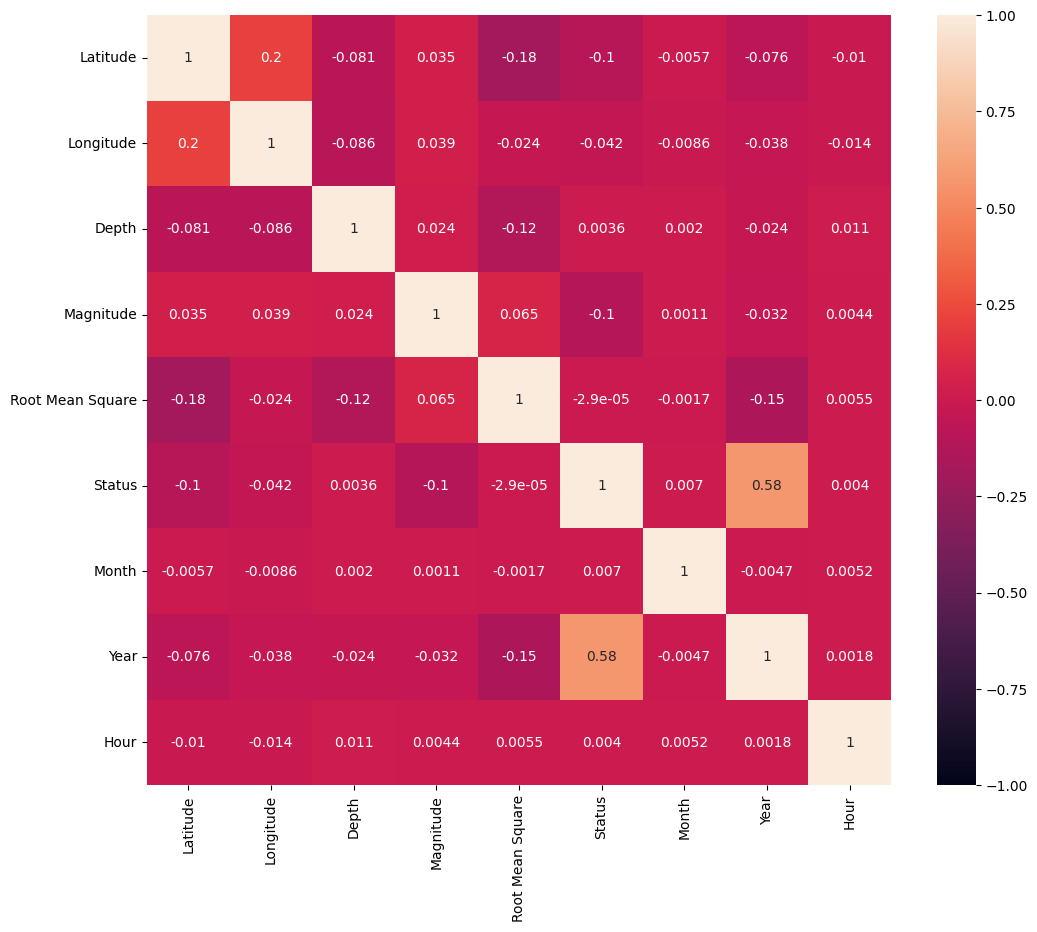

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot = True, vmin= -1, vmax= 1)
plt.show()

In [ ]:
#removing column status from
numeric_columns.remove('Status')

<ipython-input-270-7c3f88d20a49>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-270-7c3f88d20a49>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-270-7c3f88d20a49>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-270-7c3f88d20a49>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-270-7c3f88d20a49>:4: FutureWarning: 

`shade` is now deprecated i

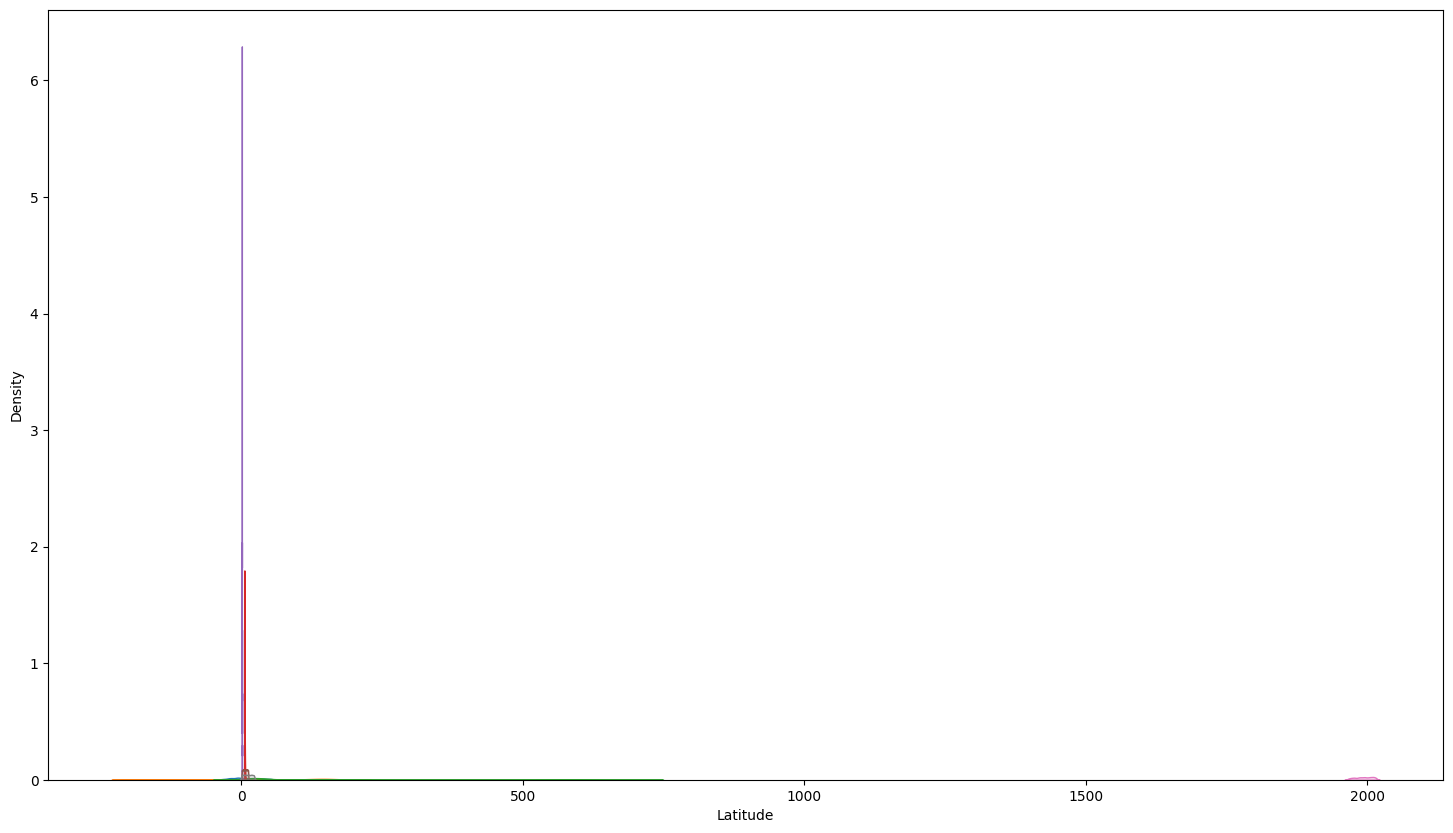

In [ ]:
#Scaling the plot
plt.figure(figsize=(18,10))
for column in numeric_columns:
  sns.kdeplot(df[column], shade=True)
plt.show()

In [ ]:
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(df[numeric_columns].copy()), columns=numeric_columns)

<ipython-input-272-686d6217da55>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
<ipython-input-272-686d6217da55>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
<ipython-input-272-686d6217da55>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
<ipython-input-272-686d6217da55>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
<ipython-input-272-686d6217d

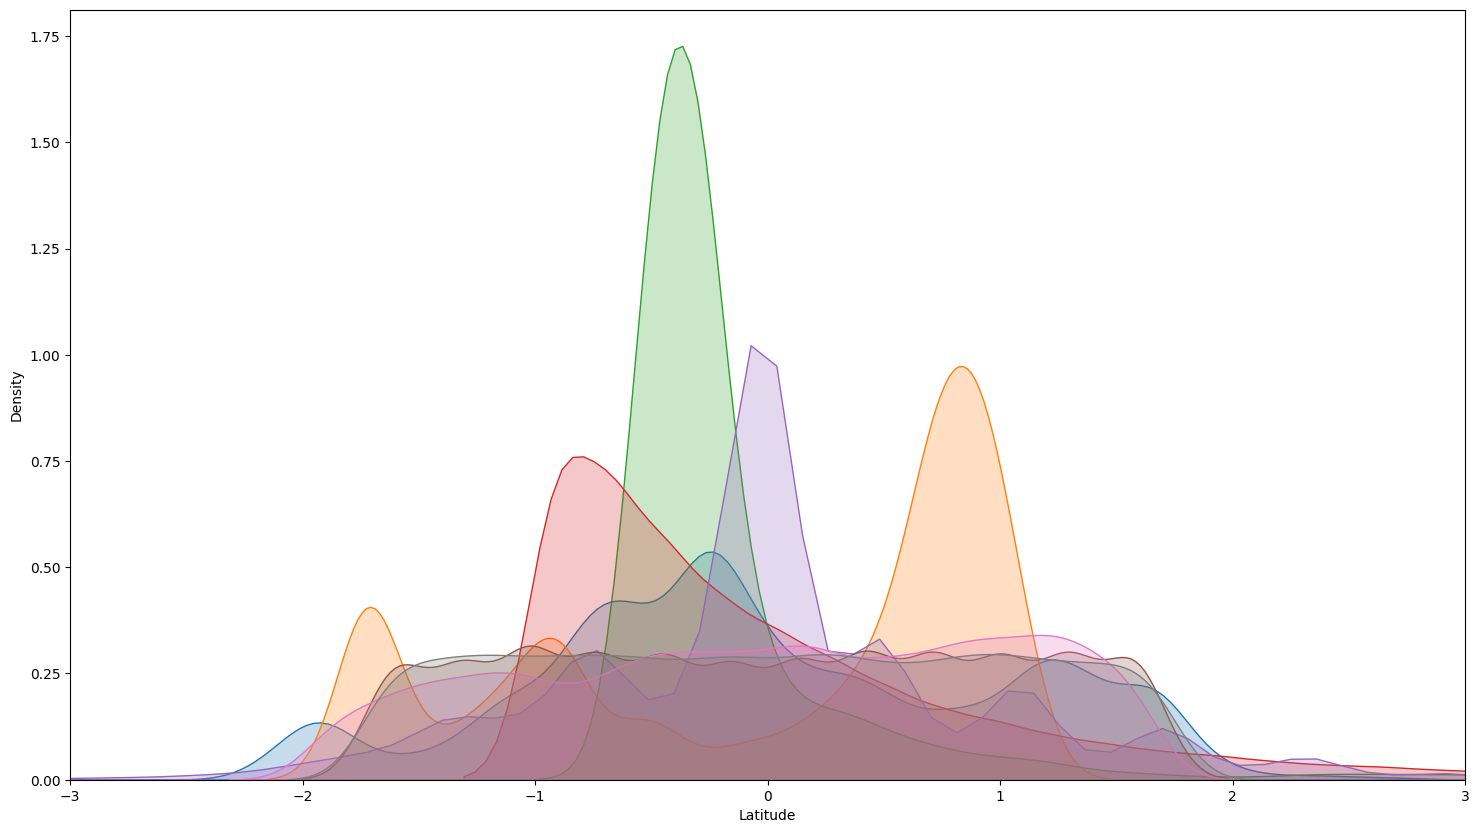

In [ ]:
#again replotting
plt.figure(figsize=(18,10))
for column in numeric_columns:
  sns.kdeplot(standardized_df[column], shade=True)
  plt.xlim(-3,3)
plt.show()

#Encoding

In [ ]:
df

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,1,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,1,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,1,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,1,12,2016,22


In [ ]:
#We used unique to find if there is any binary input. If it's a binary value then we can use lambda functiona and change into 1 and 0.
df['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)



```
# Since here we can see that'Type' column is taking more than 2 values, therefore we are using get_dummies function`
```



In [ ]:
pd.get_dummies(df['Type'], prefix='TYPE')

,TYPE_Earthquake,TYPE_Explosion,TYPE_Nuclear Explosion,TYPE_Rock Burst
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
23401,1,0,0,0
23402,1,0,0,0
23403,1,0,0,0
23404,1,0,0,0


In [ ]:
def onehot_encode(data, columns, prefixes):
  data = data.copy()
  for column, prefix in zip(columns, prefixes):
    dummies =pd.get_dummies (data[column], prefix=prefix)
    data = pd.concat([data,dummies], axis=1)
    data = data.drop(column, axis=1)
  return data

In [ ]:
df = onehot_encode(df, ['Type','Magnitude Type','Source', 'Location Source', 'Magnitude Source'], ['t','mt','s','ls','ms'])

In [ ]:
df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,t_Earthquake,...,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,1,1965,13,1,...,0,0,0,0,0,0,0,0,0,0
1,1.8630,127.3520,80.00,5.8,1.022784,0,1,1965,11,1,...,0,0,0,0,0,0,0,0,0,0
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,1,1965,18,1,...,0,0,0,0,0,0,0,0,0,0
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,1,1965,18,1,...,0,0,0,0,0,0,0,0,0,0
4,11.9380,126.4270,15.00,5.8,1.022784,0,1,1965,13,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,12.30,5.6,0.189800,1,12,2016,8,1,...,1,0,0,0,0,0,0,0,0,0
23402,38.3777,-118.8957,8.80,5.5,0.218700,1,12,2016,9,1,...,1,0,0,0,0,0,0,0,0,0
23403,36.9179,140.4262,10.00,5.9,1.520000,1,12,2016,12,1,...,0,0,0,0,0,0,1,0,0,0
23404,-9.0283,118.6639,79.00,6.3,1.430000,1,12,2016,22,1,...,0,0,0,0,0,0,1,0,0,0


# Splitting and Scaling

In [ ]:
#splitting into x and y
y = df.loc[:,'Status']
X = df.drop('Status', axis=1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=56)

#Modelling and Training


In [ ]:
X.shape

(23406, 104)

In [ ]:
y


0        0
1        0
2        0
3        0
4        0
        ..
23401    1
23402    1
23403    1
23404    1
23405    1
Name: Status, Length: 23406, dtype: int64

In [ ]:
y.mean()

0.88737930445185

In [ ]:
inputs = tf.keras. Input (shape=(104,))
x = tf.keras.layers.Dense (64, activation='relu') (inputs)
x = tf.keras.layers. Dense (64, activation= 'relu')(x)
outputs = tf.keras.layers.Dense (1, activation= 'sigmoid')(x)

model = tf.keras. Model (inputs, outputs)
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=[tf.keras.metrics.AUC (name='auc')]
)
batch_size = 32
epochs = 30

history= model.fit(
  X_train,
  y_train, batch_size-batch_size,
  validation_split=0.2,
  epochs= epochs,
  callbacks=[tf.keras.callbacks. ReduceLROnPlateau()]
)

verbose=0

Epoch 1/30
410/410 [==============================] - 3s 6ms/step - loss: 0.0329 - auc: 0.9994 - val_loss: 0.0018 - val_auc: 1.0000 - lr: 0.0010
Epoch 2/30
410/410 [==============================] - 3s 6ms/step - loss: 0.0018 - auc: 1.0000 - val_loss: 0.0029 - val_auc: 1.0000 - lr: 0.0010
Epoch 3/30
410/410 [==============================] - 1s 4ms/step - loss: 5.2900e-04 - auc: 1.0000 - val_loss: 2.1788e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 4/30
410/410 [==============================] - 1s 3ms/step - loss: 6.2353e-04 - auc: 1.0000 - val_loss: 2.9759e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 5/30
410/410 [==============================] - 2s 4ms/step - loss: 7.3176e-05 - auc: 1.0000 - val_loss: 3.9306e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 6/30
410/410 [==============================] - 2s 4ms/step - loss: 2.0550e-05 - auc: 1.0000 - val_loss: 4.3024e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 7/30
410/410 [==============================] - 1s 3ms/step - loss: 1.7138e-05 - auc: 1.0000

#Results

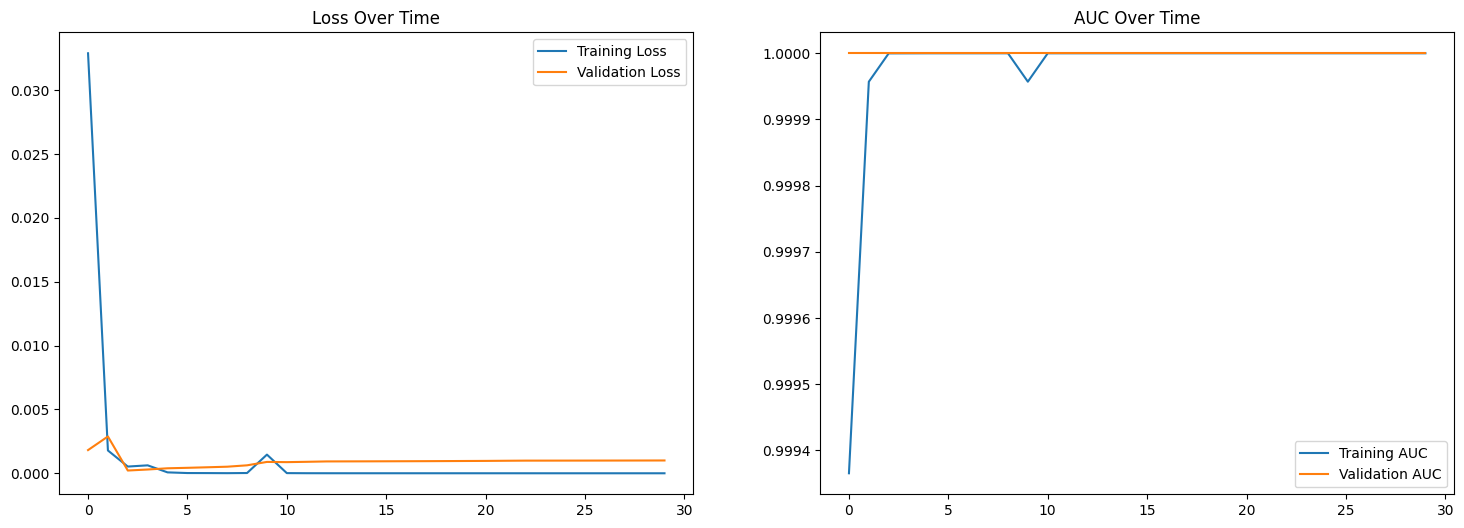

In [ ]:
plt.figure(figsize=(18, 6))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss' ], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss Over Time")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.legend()
plt.title("AUC Over Time")

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

220/220 [==============================] - 1s 5ms/step - loss: 0.0010 - auc: 1.0000


[0.0010403378400951624, 1.0]

In [ ]:
len(y_test)

7022